<a href="https://colab.research.google.com/github/ahmedmaaloul/pi-2/blob/main/matrice_correlation_donn%C3%A9es_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

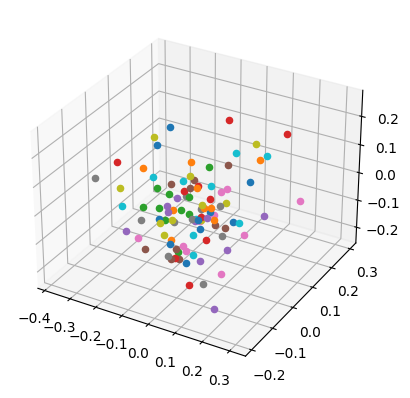

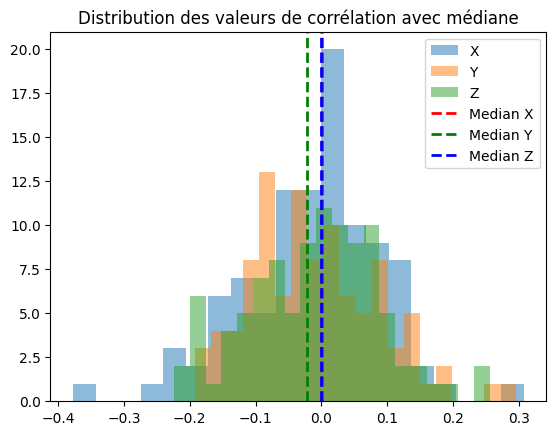

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import median  # Importez la fonction median depuis le module statistics

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

correlations = []  # Pour stocker les valeurs de corrélation

for i in range(100):#cholesky
    x = np.random.normal(0, 1, 100)
    y = np.random.normal(0, 1, 100)
    z = np.random.normal(0, 1, 100)

    df = {'x': x, 'y': y, 'z': z}

    dataframe = pd.DataFrame(df, columns=['x', 'y', 'z'])

    matrix = dataframe.corr()

    x_corr = matrix.iloc[0, 1]
    y_corr = matrix.iloc[0, 2]
    z_corr = matrix.iloc[1, 2]

    correlations.append((x_corr, y_corr, z_corr))  # Ajoutez les valeurs de corrélation à la liste

# Affichez le graphique 3D
for x_corr, y_corr, z_corr in correlations:
    ax.scatter(x_corr, y_corr, z_corr)

# Calculez la médiane des valeurs de corrélation
median_x = median([x for x, _, _ in correlations])
median_y = median([y for _, y, _ in correlations])
median_z = median([z for _, _, z in correlations])

# Créez un histogramme
plt.figure()
plt.hist([x for x, _, _ in correlations], bins=20, alpha=0.5, label='X')
plt.hist([y for _, y, _ in correlations], bins=20, alpha=0.5, label='Y')
plt.hist([z for _, _, z in correlations], bins=20, alpha=0.5, label='Z')

# Affichez la ligne verticale pour la médiane
plt.axvline(median_x, color='r', linestyle='dashed', linewidth=2, label='Median X')
plt.axvline(median_y, color='g', linestyle='dashed', linewidth=2, label='Median Y')
plt.axvline(median_z, color='b', linestyle='dashed', linewidth=2, label='Median Z')

plt.legend(loc='upper right')
plt.title('Distribution des valeurs de corrélation avec médiane')
plt.show()


In [ ]:
import pandas as pd
df_apple = pd.read_csv('/content/AAPL.csv', delimiter= ',')
df_meta= pd.read_csv('/content/META.csv', delimiter= ',')
df_microsoft=pd.read_csv('/content/MSFT.csv', delimiter= ',')
print(df_apple.head())
print(df_meta.head())
print(df_microsoft.head())


#Rendement quotidien (%) =
#[(Prix de clôture du jour suivant - Prix de clôture du jour précédent) / Prix de clôture du jour précédent] * 100


         Date        Open        High         Low       Close   Adj Close  \
0  2022-10-10  140.419998  141.889999  138.570007  140.419998  139.591888   
1  2022-10-11  139.899994  141.350006  138.220001  138.979996  138.160370   
2  2022-10-12  139.130005  140.360001  138.160004  138.339996  137.524155   
3  2022-10-13  134.990005  143.589996  134.369995  142.990005  142.146729   
4  2022-10-14  144.309998  144.520004  138.190002  138.380005  137.563919   

      Volume  
0   74899000  
1   77033700  
2   70433700  
3  113224000  
4   88598000  
         Date        Open        High         Low       Close   Adj Close  \
0  2022-10-10  133.550003  136.110001  131.869995  133.789993  133.789993   
1  2022-10-11  131.619995  132.660004  126.989998  128.539993  128.539993   
2  2022-10-12  128.320007  129.669998  126.250000  127.500000  127.500000   
3  2022-10-13  123.529999  131.139999  122.529999  130.289993  130.289993   
4  2022-10-14  131.000000  131.789993  126.519997  126.760002 

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df_apple['Rendement quotidien'] = ((df_apple['Close'].shift(-1) - df_apple['Close']) / df_apple['Close']) * 100
print(df_apple)
df_meta['Rendement quotidien'] = ((df_meta['Close'].shift(-1) - df_meta['Close']) / df_meta['Close']) * 100
print(df_meta)
df_microsoft['Rendement quotidien'] = ((df_microsoft['Close'].shift(-1) - df_microsoft['Close']) / df_microsoft['Close']) * 100
print(df_microsoft)



           Date        Open        High         Low       Close   Adj Close  \
0    2022-10-10  140.419998  141.889999  138.570007  140.419998  139.591888   
1    2022-10-11  139.899994  141.350006  138.220001  138.979996  138.160370   
2    2022-10-12  139.130005  140.360001  138.160004  138.339996  137.524155   
3    2022-10-13  134.990005  143.589996  134.369995  142.990005  142.146729   
4    2022-10-14  144.309998  144.520004  138.190002  138.380005  137.563919   
..          ...         ...         ...         ...         ...         ...   
245  2023-10-02  171.220001  174.300003  170.929993  173.750000  173.750000   
246  2023-10-03  172.259995  173.630005  170.820007  172.399994  172.399994   
247  2023-10-04  171.089996  174.210007  170.970001  173.660004  173.660004   
248  2023-10-05  173.789993  175.449997  172.679993  174.910004  174.910004   
249  2023-10-06  173.800003  177.990005  173.179993  177.490005  177.490005   

        Volume  Rendement quotidien  
0     7489900

In [ ]:
#correction calcul des rendements

# Créez un DataFrame close_prices avec les colonnes des stocks et les dates comme index
close_prices = pd.DataFrame({
    'Apple': df_apple['Close'],
    'Meta': df_meta['Close'],
    'Microsoft': df_microsoft['Close']
})

# Calculez les rendements quotidiens en utilisant la convention typique prix aujourdhui par rapport a hier
df_rendement = (close_prices / close_prices.shift(1) - 1)*100
returns = close_prices.pct_change()*100

# Imprimez les rendements
print(df_rendement)
print(returns)

        Apple      Meta  Microsoft
0         NaN       NaN        NaN
1   -1.025496 -3.924060  -1.675026
2   -0.460498 -0.809081   0.150834
3    3.361290  2.188230   3.760800
4   -3.224002 -2.709334  -2.424866
..        ...       ...        ...
245  1.483554  2.201797   1.916069
246 -0.776982 -1.916435  -2.613416
247  0.730864  1.541831   1.777330
248  0.719797 -0.258518   0.125406
249  1.475045  3.490923   2.473705

[250 rows x 3 columns]
        Apple      Meta  Microsoft
0         NaN       NaN        NaN
1   -1.025496 -3.924060  -1.675026
2   -0.460498 -0.809081   0.150834
3    3.361290  2.188230   3.760800
4   -3.224002 -2.709334  -2.424866
..        ...       ...        ...
245  1.483554  2.201797   1.916069
246 -0.776982 -1.916435  -2.613416
247  0.730864  1.541831   1.777330
248  0.719797 -0.258518   0.125406
249  1.475045  3.490923   2.473705

[250 rows x 3 columns]


In [ ]:
# Pour avoir juste les coefs de corrélation
#corr_apple = df_apple['Rendement quotidien'].corr(df_meta['Rendement quotidien'])
#corr_meta = df_meta['Rendement quotidien'].corr(df_microsoft['Rendement quotidien'])
#corr_microsoft = df_microsoft['Rendement quotidien'].corr(df_apple['Rendement quotidien'])

#print("Coefficient de corrélation entre Apple et META :")
#print(corr_apple)
#print("\nCoefficient de corrélation entre META et Microsoft :")
#print(corr_meta)
#print("\nCoefficient de corrélation entre Microsoft et Apple :")
#print(corr_microsoft)


# Pour avoir toute la matrice de corrélation
#data = {
   # "Apple": df_apple['Rendement quotidien'],
    #"META": df_meta['Rendement quotidien'],
   # "Microsoft": df_microsoft['Rendement quotidien']
#}

#df_rendements = pd.DataFrame(data)


# Calculer la matrice de corrélation
matrice_corr = df_rendement.corr()

# Afficher la matrice de corrélation
print(matrice_corr)


              Apple      Meta  Microsoft
Apple      1.000000  0.528078   0.671405
Meta       0.528078  1.000000   0.555030
Microsoft  0.671405  0.555030   1.000000


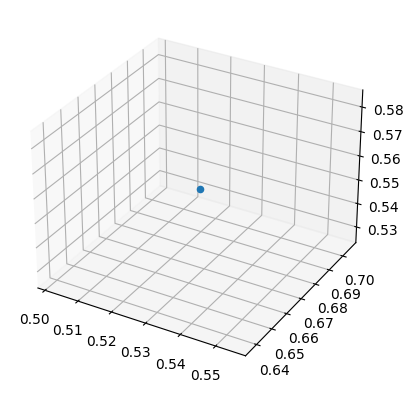

In [ ]:
#méthode d'affichage
import matplotlib.pyplot as plt
fig=plt.figure()
ax= fig.add_subplot(projection='3d')
ax.scatter(matrice_corr.iloc[0,1],matrice_corr.iloc[0,2],matrice_corr.iloc[1,2])

In [ ]:
import pandas as pd
# Le fichier csv est dispo sur le Teams, c'est les données sur 1 an de toutes
# les actions du s&p500, c'est le code python de scrapping qui l'a fait

df_snp500 = pd.read_csv('/content/stock_data_cleaned1y.csv', delimiter= ',')
print(len(df_snp500))
df_snp500cl = df_snp500.dropna()

# Identifier les dataframes par ticker

groupes_tickers = df_snp500.groupby('Ticker')
print(groupes_tickers.head())

122049
              Date Ticker        Open       Close   Adj Close
0       2022-10-07    MMM  110.370003  107.519997  101.794029
1       2022-10-10    MMM  108.529999  108.459999  102.683975
2       2022-10-11    MMM  108.500000  108.839996  103.043739
3       2022-10-12    MMM  108.570000  108.949997  103.147881
4       2022-10-13    MMM  107.500000  114.260002  108.175102
...            ...    ...         ...         ...         ...
121798  2022-10-07    ZTS  151.080002  147.369995  146.077118
121799  2022-10-10    ZTS  148.100006  145.779999  144.501068
121800  2022-10-11    ZTS  145.770004  146.250000  144.966949
121801  2022-10-12    ZTS  146.929993  145.860001  144.580383
121802  2022-10-13    ZTS  142.000000  148.639999  147.335999

[2438 rows x 5 columns]


In [ ]:
def calculer_rendements_quotidiens(groupe):
    groupe['Rendement Quotidien'] = (groupe['Close'] - groupe['Close'].shift(1)) / groupe['Close'].shift(1) * 100
    return groupe

#Liste des dataframes avec la colonne Rendement Quotidien
l_dataframes_rendements = [calculer_rendements_quotidiens(groupe).dropna() for _, groupe in groupes_tickers]

In [ ]:
#correction calcul des rendements

# Créez un DataFrame close_prices avec les colonnes des stocks et les dates comme index

tickers = df_snp500['Ticker'].unique().tolist()
close_price ={ticker : rdmt for ticker, rdmt in zip([t for t in tickers], [l_dataframes_rendements[i]['Close'].tolist() for i in range(len(l_dataframes_rendements))])}

# On enleve les actions dont les rendements ne contiennent pas 250 données pour éviter les bugs
print(len(close_price))
asup = []
for i in close_price:
  if len(close_price[i]) != 250 :
    asup.append(i)
for i in asup:
  del close_price[i]


df_close_price = pd.DataFrame(close_price)
# Calculez les rendements quotidiens en utilisant la convention typique prix aujourdhui paar rapport a hier
returns=df_close_price.pct_change()*100
##returns=close_prices.pct_change()*100
# Imprimez les rendements
print(returns)
##print(returns) autre méthode

matrice_corr = returns.corr()
print(matrice_corr)

488
          MMM       AOS       ABT      ABBV       ACN      ATVI       ADM  \
0         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1   -0.246127  1.742739 -1.025497  2.313641 -3.757094  0.613075 -0.107202   
2    0.039799  3.588904 -0.460497 -1.081195  5.176932 -1.641276 -2.210772   
3    1.758293  2.755909  3.361291  2.100302  0.267025  2.388089  4.323963   
4   -1.720097  0.459766 -3.224002  0.013997 -3.098089 -1.522394 -1.115083   
..        ...       ...       ...       ...       ...       ...       ...   
245 -0.822749 -0.468387  1.483554 -0.543404 -0.473733 -1.156422 -0.426542   
246 -0.577096 -3.607843 -0.776982 -0.553125 -6.466018  0.062674 -1.776494   
247  1.278792  3.580143  0.730864  0.176362 -0.250528 -0.146152  3.206773   
248 -1.182054  0.942662  0.719797 -0.162506 -1.899384  0.575008  1.466568   
249  0.262801 -0.700390  1.475045  0.535781  1.096090  0.706861  0.661442   

         ADBE       ADP       AES  ...       WTW       GWW      WYNN  \

In [ ]:
# On crée un dictionnaire des rendements identifiables par ticker
#1er essai
#data = { }
#cpt = 0
#for i in dataframes_ind :
#  data[i] = l_dataframes_rendements[cpt]['Rendement Quotidien'].tolist()
#  cpt += 1

# 2eme essai / clés:tickers ; valeurs:listes de rendements
tickers = df_snp500['Ticker'].unique().tolist()
dataTEST = {ticker : rdmt for ticker, rdmt in zip([t for t in tickers], [l_dataframes_rendements[i]['Rendement Quotidien'].tolist() for i in range(len(l_dataframes_rendements))])}



# On enleve les actions dont les rendements ne contiennent pas 250 données pour éviter les bugs
print(len(dataTEST))
asup = []
for i in dataTEST :
  if len(dataTEST[i]) != 250 :
    asup.append(i)
for i in asup:
  del dataTEST[i]
print(len(dataTEST))


df_rendements = pd.DataFrame(dataTEST).fillna(0)
print(df_rendements)


# Calculer la matrice de corrélation : RENDEMENTS SUR 1 AN
matrice_corr = df_rendements.corr()
print(matrice_corr)

488
485
          MMM       AOS       ABT      ABBV       ACN      ATVI       ADM  \
0   -1.169182 -1.067324  0.235564 -0.324299  2.257230 -0.648397  2.123935   
1   -0.246127  1.742739 -1.025497  2.313641 -3.757094  0.613075 -0.107202   
2    0.039799  3.588904 -0.460497 -1.081195  5.176932 -1.641276 -2.210772   
3    1.758293  2.755909  3.361291  2.100302  0.267025  2.388089  4.323963   
4   -1.720097  0.459766 -3.224002  0.013997 -3.098089 -1.522394 -1.115083   
..        ...       ...       ...       ...       ...       ...       ...   
245 -0.822749 -0.468387  1.483554 -0.543404 -0.473733 -1.156422 -0.426542   
246 -0.577096 -3.607843 -0.776982 -0.553125 -6.466018  0.062674 -1.776494   
247  1.278792  3.580143  0.730864  0.176362 -0.250528 -0.146152  3.206773   
248 -1.182054  0.942662  0.719797 -0.162506 -1.899384  0.575008  1.466568   
249  0.262801 -0.700390  1.475045  0.535781  1.096090  0.706861  0.661442   

         ADBE       ADP       AES  ...        WTW       GWW      WY

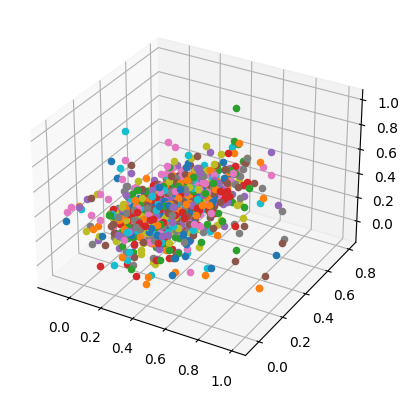

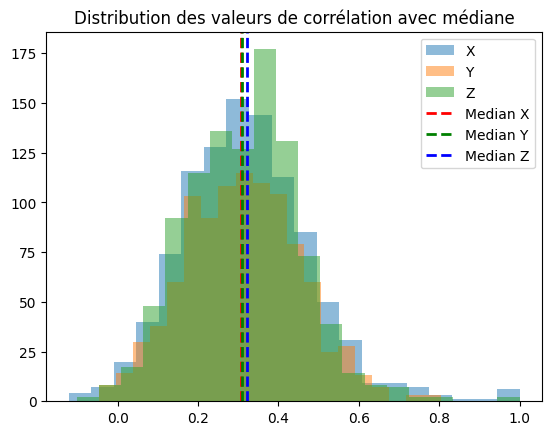

In [ ]:
# 1000 tirages 3 actions aleatoires
import matplotlib.pyplot as plt
from random import randint
from statistics import median
# Créez la figure 3D et l'axe
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

def mat_corr_hasard03():
    correlations = []  # Pour stocker les valeurs de corrélation
    for i in range(1000):
        nbs = [randint(0, 484) for i in range(3)]
        nbs.sort()
        x, y, z = matrice_corr.iloc[nbs[0], nbs[1]], matrice_corr.iloc[nbs[0], nbs[2]], matrice_corr.iloc[nbs[1], nbs[2]]
        correlations.append((x, y, z))  # Ajoutez les valeurs de corrélation à la liste

    # Affichez le graphique 3D
    for x, y, z in correlations:
        ax.scatter(x, y, z)

    # Calculez la médiane des valeurs de corrélation
    median_x = median([x for x, _, _ in correlations])
    median_y = median([y for _, y, _ in correlations])
    median_z = median([z for _, _, z in correlations])

    # Créez un histogramme
    plt.figure()
    plt.hist([x for x, _, _ in correlations], bins=20, alpha=0.5, label='X')
    plt.hist([y for _, y, _ in correlations], bins=20, alpha=0.5, label='Y')
    plt.hist([z for _, _, z in correlations], bins=20, alpha=0.5, label='Z')

    # Affichez la ligne verticale pour la médiane
    plt.axvline(median_x, color='r', linestyle='dashed', linewidth=2, label='Median X')
    plt.axvline(median_y, color='g', linestyle='dashed', linewidth=2, label='Median Y')
    plt.axvline(median_z, color='b', linestyle='dashed', linewidth=2, label='Median Z')

    plt.legend(loc='upper right')
    plt.title('Distribution des valeurs de corrélation avec médiane')
    plt.show()

# Appel de la fonction
mat_corr_hasard03()


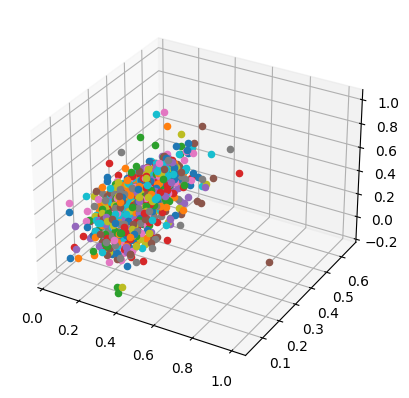

In [ ]:
# Corrélation de 3 actions dont 2 tirées au hasard et 1 fixée (laquelle?)

import random

fig=plt.figure()
ax= fig.add_subplot(projection='3d')

def mat_corr_hasard12(n): #n dans [[0,484]]
  for i in range(1000):

    nbs = [randint(0,484) for i in range(2)]
    if n in nbs:
      while n in nbs :
        nbs = [randint(0,484) for i in range(2)]
    nbs.append(n)
    nbs.sort()
    x,y,z = matrice_corr.iloc[nbs[0],nbs[1]], matrice_corr.iloc[nbs[0],nbs[2]], matrice_corr.iloc[nbs[1],nbs[2]]
    ax.scatter(x,y,z)

mat_corr_hasard12(20)

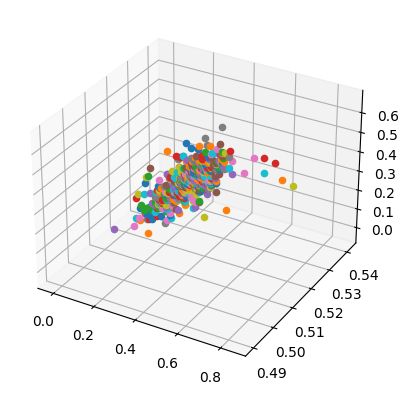

In [ ]:
# 2 fixés et 1 prise au hasard
import random

fig=plt.figure()
ax= fig.add_subplot(projection='3d')
L = [i for i in range(0,484)]
def mat_corr_hasard21(n,m): #n,m dans [[0,484]]
  rd = 0

  for i in L :
    rd = i
    nbs = [rd]
    if (n not in nbs and m not in nbs):
      nbs.append(n)
      nbs.append(m)
      nbs.sort()
      x,y,z = matrice_corr.iloc[nbs[0],nbs[1]], matrice_corr.iloc[nbs[0],nbs[2]], matrice_corr.iloc[nbs[1],nbs[2]]
      ax.scatter(x,y,z)


mat_corr_hasard21(0,484)